<a href="https://colab.research.google.com/github/amitjslearn/semantic-textual-similarity/blob/master/Universal_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universal Sentence Encoder


<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>


Original example here https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


This notebook illustrates how to access the Universal Sentence Encoder and use it for sentence similarity and sentence classification tasks.

The Universal Sentence Encoder makes getting sentence level embeddings as easy as it has historically been to lookup the embeddings for individual words. The sentence embeddings can then be trivially used to compute sentence level meaning similarity as well as to enable better performance on downstream classification tasks using less supervised training data.


# Getting Started

This section sets up the environment for access to the Universal Sentence Encoder on TF Hub and provides examples of applying the encoder to words, sentences, and paragraphs.

In [0]:
# Install the latest Tensorflow version.
!pip3 install --quiet "tensorflow>=1.7"
# Install TF-Hub.
!pip3 install --quiet tensorflow-hub
!pip3 install --quiet seaborn

More detailed information about installing Tensorflow can be found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/).

In [0]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [0]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [0]:
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

In [0]:

# Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NLP/Text_Similarity_Dataset.csv')

In [0]:
text1 = data.text1

In [0]:
text1[0]

'savvy searchers fail to spot ads internet search engine users are an odd mix of naive and sophisticated  suggests a report into search habits.  the report by the us pew research center reveals that 87% of searchers usually find what they were looking for when using a search engine. it also shows that few can spot the difference between paid-for results and organic ones. the report reveals that 84% of net users say they regularly use google  ask jeeves  msn and yahoo when online.  almost 50% of those questioned said they would trust search engines much less  if they knew information about who paid for results was being hidden. according to figures gathered by the pew researchers the average users spends about 43 minutes per month carrying out 34 separate searches and looks at 1.9 webpages for each hunt. a significant chunk of net users  36%  carry out a search at least weekly and 29% of those asked only look every few weeks. for 44% of those questioned  the information they are looking

In [0]:
np.array(text1).shape

(4023,)

In [0]:
text1[len(text1)-1]

'nuclear dumpsite  plan attacked plans to allow foreign nuclear waste to be permanently stored in the uk have been branded  deeply irresponsible  by the liberal democrats.  the government has confirmed intermediate level waste (ilw) that was to have been shipped back to its home countries will now be stored in the uk. the cash raised will go towards the uk s nuclear clean-up programme. but lib dem norman baker accused ministers of turning britain into a  nuclear dumpsite .  under current contracts  british nuclear fuels should return all but low level waste  but none has ever been sent back. in future  only highly-radioactive waste will be sent back to its country of origin  normally germany or japan  under armed guard. intermediate waste from countries such as japan  germany  spain  italy  switzerland and sweden will be stored permanently in the uk. at the moment  this waste is stored at sellafield  in cumbria  in the form of glass bricks  untreated liquid waste or solid material in d

In [0]:
%%time
# Reduce logging output.
logging.set_verbosity(logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  text1_embeddings = session.run(embed(text1))

#   for i, text1_embedding in enumerate(np.array(text1_embeddings).tolist()):
#     print("Message: {}".format(text1[i]))
#     print("Embedding size: {}".format(len(text1_embedding)))
#     text1_embedding_snippet = ", ".join(
#         (str(x) for x in text1_embedding[:3]))
#     print("Embedding: [{}, ...]\n".format(text1_embedding_snippet))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


CPU times: user 58.7 s, sys: 1.86 s, total: 1min
Wall time: 57.1 s


In [0]:
len(text1_embeddings[0])

512

In [0]:
text2 = data.text2

In [0]:
%%time
# Reduce logging output.
logging.set_verbosity(logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  text2_embeddings = session.run(embed(text1))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


CPU times: user 59.4 s, sys: 1.83 s, total: 1min 1s
Wall time: 57.7 s


# Semantic Textual Similarity Task

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [0]:
corr = np.inner(text1_embeddings, text2_embeddings)

In [0]:
corr.shape[0]

4023

In [0]:
sim = []
for i in range(corr.shape[0]):
    sim.append(corr[i][i])

In [0]:
for i in range(corr.shape[0]):
    sim.append(corr[i][i])

In [0]:
min(sim)

0.9999993

In [0]:
# plotting

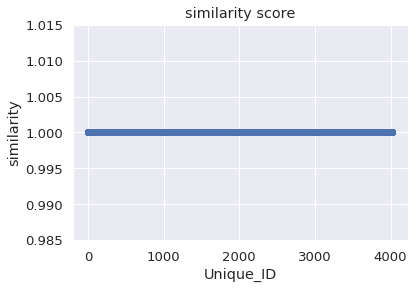

In [0]:
x = np.array(data.Unique_ID)
y = sim
plt.scatter(x,y)
plt.title("similarity score")
plt.xlabel("Unique_ID")
plt.ylabel("similarity")
plt.show()

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(text1_embeddings, text2_embeddings)

In [0]:
sim_2 = []
for i in range(corr.shape[0]):
    sim_2.append(cos_sim[i][i])

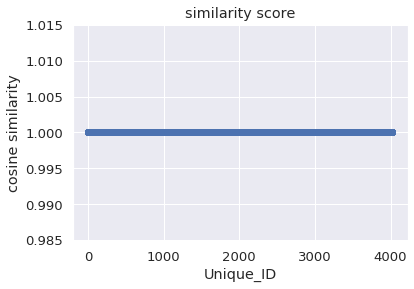

In [0]:
x = np.array(data.Unique_ID)
y = sim_2
plt.scatter(x,y)
plt.title("similarity score")
plt.xlabel("Unique_ID")
plt.ylabel("cosine similarity")
plt.show()

In [0]:
def runn(session_, input_tensor_, messages_, encoding_tensor):
  message_embeddings_ = session_.run(encoding_tensor, feed_dict={input_tensor_: messages_})

In [0]:
similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_text_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  runn(session, similarity_input_placeholder, text1,
               similarity_text_encodings)

In [0]:
np.inner?

In [0]:
session.run?

In [0]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")


def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  plot_similarity(messages_, message_embeddings_, 90)

In [0]:
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

In [0]:
embeddings.shape

TensorShape([Dimension(None), Dimension(512)])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


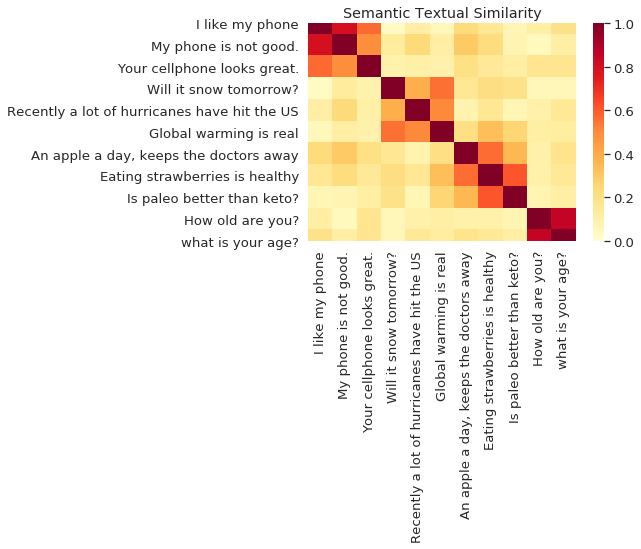

In [0]:
similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)

## Evaluation: STS (Semantic Textual Similarity) Benchmark

The [**STS Benchmark**](http://ixa2.si.ehu.es/stswiki/index.php/STSbenchmark) provides an intristic evaluation of the degree to which similarity scores computed using sentence embeddings align with human judgements. The benchmark requires systems to return similarity scores for a diverse selection of sentence pairs. [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is then used to evaluate the quality of the machine similarity scores against human judgements.

### Download data

In [0]:
import pandas
import scipy
import math


def load_sts_dataset(filename):
  # Loads a subset of the STS dataset into a DataFrame. In particular both
  # sentences and their human rated similarity score.
  sent_pairs = []
  with tf.gfile.GFile(filename, "r") as f:
    for line in f:
      ts = line.strip().split("\t")
      # (sent_1, sent_2, similarity_score)
      sent_pairs.append((ts[5], ts[6], float(ts[4])))
  return pandas.DataFrame(sent_pairs, columns=["sent_1", "sent_2", "sim"])


def download_and_load_sts_data():
  sts_dataset = tf.keras.utils.get_file(
      fname="Stsbenchmark.tar.gz",
      origin="http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz",
      extract=True)

  sts_dev = load_sts_dataset(
      os.path.join(os.path.dirname(sts_dataset), "stsbenchmark", "sts-dev.csv"))
  sts_test = load_sts_dataset(
      os.path.join(
          os.path.dirname(sts_dataset), "stsbenchmark", "sts-test.csv"))

  return sts_dev, sts_test


sts_dev, sts_test = download_and_load_sts_data()

417792/409630 [==============================] - 2s 4us/step


### Build Evaluation Graph

In [0]:
sts_input1 = tf.placeholder(tf.string, shape=(None))
sts_input2 = tf.placeholder(tf.string, shape=(None))

# For evaluation we use exactly normalized rather than
# approximately normalized.
sts_encode1 = tf.nn.l2_normalize(embed(sts_input1), axis=1)
sts_encode2 = tf.nn.l2_normalize(embed(sts_input2), axis=1)
cosine_similarities = tf.reduce_sum(tf.multiply(sts_encode1, sts_encode2), axis=1)
clip_cosine_similarities = tf.clip_by_value(cosine_similarities, -1.0, 1.0)
sim_scores = 1.0 - tf.acos(clip_cosine_similarities)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


### Evaluate Sentence Embeddings

In [0]:
sts_data = sts_dev #@param ["sts_dev", "sts_test"] {type:"raw"}

In [0]:
text_a = sts_data['sent_1'].tolist()
text_b = sts_data['sent_2'].tolist()
dev_scores = sts_data['sim'].tolist()

def run_sts_benchmark(session):
  """Returns the similarity scores"""
  emba, embb, scores = session.run(
      [sts_encode1, sts_encode2, sim_scores],
      feed_dict={
          sts_input1: text_a,
          sts_input2: text_b
      })
  return scores


with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  scores = run_sts_benchmark(session)

pearson_correlation = scipy.stats.pearsonr(scores, dev_scores)
print('Pearson correlation coefficient = {0}\np-value = {1}'.format(
    pearson_correlation[0], pearson_correlation[1]))

Pearson correlation coefficient = 0.7629210325802708
p-value = 4.515576377999594e-286
